<a href="https://colab.research.google.com/github/ECV21/data-science-portafolio/blob/main/El_proyecto_%22Titanic's_Sinking%22_en_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Titanic

In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.0 MB/s eta 0:00:00


In [3]:
#Manipulación de dataset
import pandas as pd
import numpy as np

#visualización del dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Para darle estilo a las visualizaciones
sns.set()

#ibrería para procesar data
from sklearn.preprocessing import LabelEncoder

#Models
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

#Model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## Carga del Training dataset

In [4]:
train_df = pd.read_csv('train.csv')
train_df.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data dictionary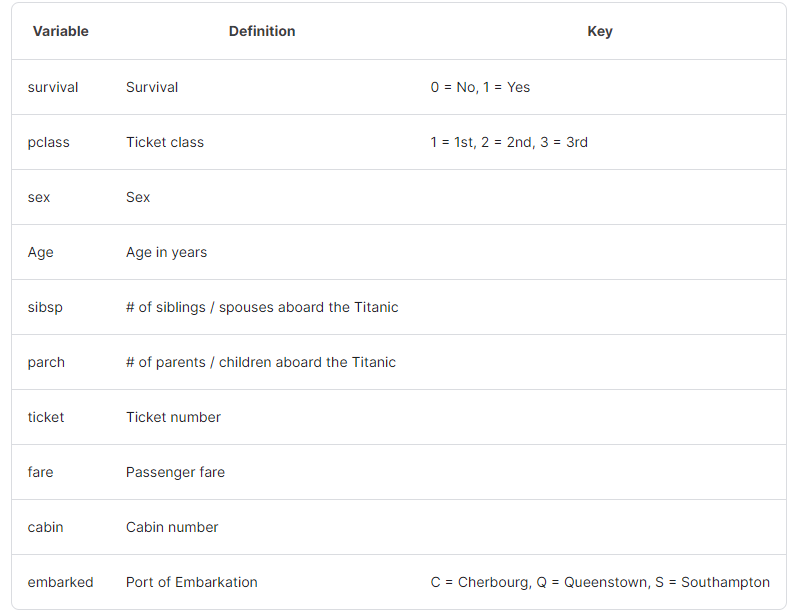


##Exploración del dataset

Variable Notes
* pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...

* Sibling = brother, sister, stepbrother, stepsister

* Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...

* Parent = mother, father

* Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [8]:
train_df.info()
#Tenemos 12 columnas, varios records nulls, ints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# estadística descriptiva del dataset
#train_df.describe() #solo datos numéricos
train_df.describe(include='all') #incluye datos numéricos y NO numéricos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Con lo anterior podemos ver que la variable "Cabin" tiene el mayor número de NAN/null.


In [14]:
#Eliminar variable anterior:
train_df=train_df.drop(['Cabin'], axis=1)
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [15]:
#Acomplera datos faltantes en AGE, tenemos en total 891 PERSONAS; con AGE solo hay 714, rellenar el resto con la mediana.
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [16]:
#Acompletar datos faltantes en columna Embarked, rellenar con la MODA de dicha columna/variable
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [18]:
# Revisar que no hay datos faltantes(en AGE y EMBARKED) ni columnas inservibles
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


#Variables relevantes que nos puedan ayudar a determinas si un pasajero sobrevivirá o no al hundimiento del TITANIC

<Axes: xlabel='Survived,Sex'>

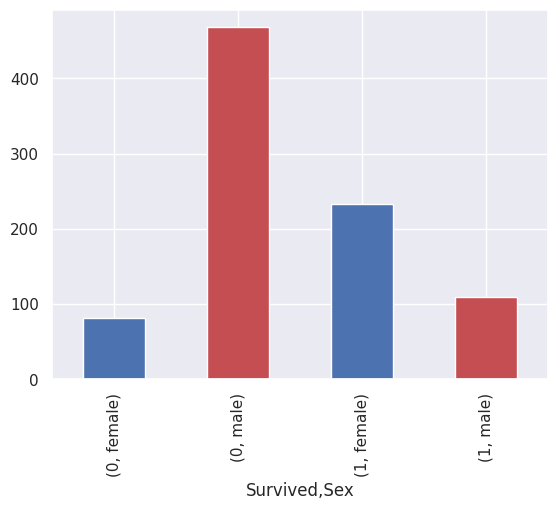

In [21]:
#Variable GENERO, ver las personas que sobrevivieron de acuerdo a su género
train_df[['Survived', 'Sex']].value_counts(sort=False).plot(kind='bar', color=['b', 'r'])
#Red no sobrevive, Blue sí sobrevive

Se puede ver que sobrevivieron más mujeres (color azul) que hombres. La barra roja muestra el número de personas NO sobrevieron en ambos géneros, claramente la barra roja en hombres es mayor.

De lo anterior, podemos concluir que el genero podría pedecir si alguien sobrevive o no.

In [24]:
#convertir variable anterior en 0 y 1, para no tener texto.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
encoder_gender = label_encoder.fit_transform(train_df['Sex']) #crear columna que transforma columna SEX en 1 y 0

#creación de nueva columna del SEX pero en código: 1(hombre) y 0(mujer)
train_df['Encoder_sex']=encoder_gender

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Encoder_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


# Matriz de correlación

Identifica qué variables númericas tiene relación con la variable "Survived"

<ipython-input-25-6da0c4283657>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_df.corr()


<Axes: >

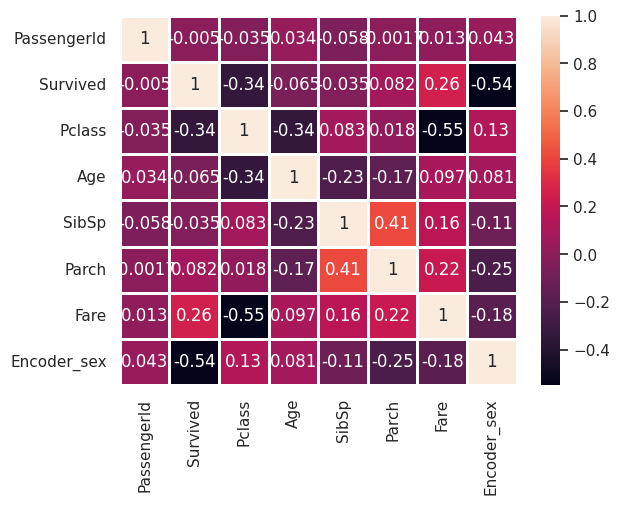

In [25]:
#Crear matriz de correlación
correlation = train_df.corr()
sns.heatmap(correlation, annot=True, linewidths=1)

Las variables más cercanas a 1 indican una relación positiva(Si una sube la otra también), un número cercano a -1 indica que la relación directamente negativa(si una variable baja la otra variable sube); un número cercano a 0 indica que no hay relación alguna entre las varibales.

* Passengerid vs Survived, prácticamente no tienen relación alguna
* Pclass vs survived tiene una relación negativa de -0.34, más o menos alta
* Age vs survived tiene una relación negativa de -0.065; baja
* Fare vs survived tienen una relación positiva de 0.26
* SEX (Encoder_sex) vs survived tiene una relación negativa del -0.54, +/- alta

<Axes: xlabel='Survived,SibSp'>

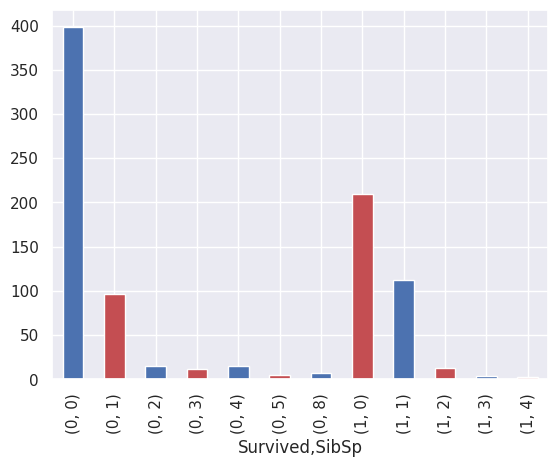

In [26]:
#relación entre variable categórica:Survived vs SibSp

train_df[['Survived', 'SibSp']].value_counts(sort=False).plot(kind='bar', color=['b', 'r'])

El número de SibSP (Sibling = brother, sister, stepbrother, stepsister) sí influye en al sobrevivencia de la persona; más parientes tienes más podrías sobrevivir(BLUE)

<Axes: xlabel='Survived,Parch'>

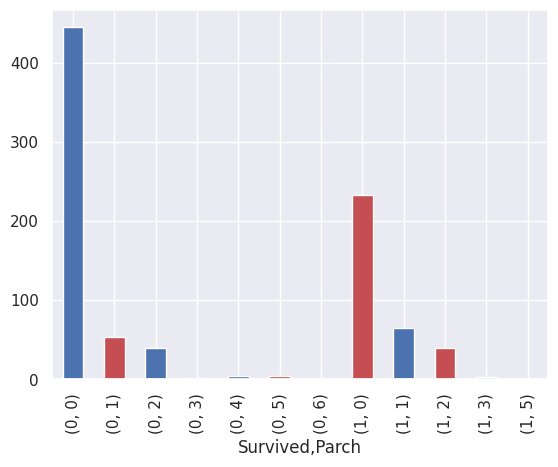

In [27]:
#relación entre variable categórica: Survived vs Parch: The dataset defines family relations in this way Parent = mother, father
      #Child = daughter, son, stepdaughter, stepson

train_df[['Survived', 'Parch']].value_counts(sort=False).plot(kind='bar', color=['b', 'r'])

El número de padre/Parch influye si una persona puede subrevivir(AZUL) o no (RED)

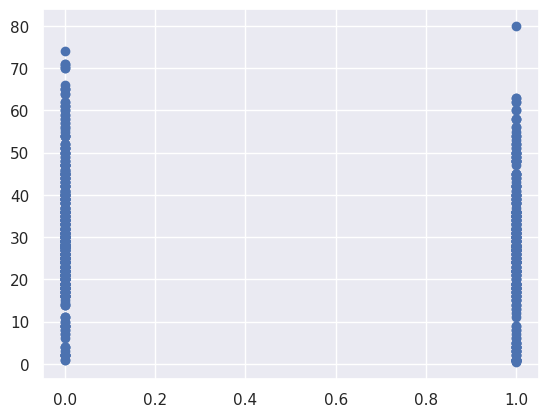

In [30]:
#Relación de variable númerica: AGE vs Survived(1=sobrevive)

plt.scatter(train_df['Survived'], train_df['Age'])

LA vairbale AGE para que no influye en en si sobrevive o no.

In [32]:
#variables que nos ayudaran a predecir si una persona sobrevive o no:

train_predictors = train_df.drop(['PassengerId','Name','Age','Ticket','Sex', 'Survived',
                                  'Ticket'],axis=1)
train_predictors.head()

,Pclass,SibSp,Parch,Fare,Embarked,Encoder_sex
0,3,1,0,7.2500,S,1
1,1,1,0,71.2833,C,0
2,3,0,0,7.9250,S,0
3,1,1,0,53.1000,S,0
4,3,0,0,8.0500,S,1


In [33]:
#crear variable dummies para nuestras columnas categórica: Embarked
dummy_encoded = pd.get_dummies(train_predictors)
dummy_encoded.head()

,Pclass,SibSp,Parch,Fare,Encoder_sex,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,1,0,0,1
1,1,1,0,71.2833,0,1,0,0
2,3,0,0,7.9250,0,0,0,1
3,1,1,0,53.1000,0,0,0,1
4,3,0,0,8.0500,1,0,0,1


In [34]:
# Varible de salida/target o varibale a predecir
y_target = train_df['Survived'].values
x_predictors_1 = dummy_encoded.values #variable predictoras serán las variables dummies antes creadas (SIN AGE)

In [35]:
# Vairbles de entrenamiento y de test

x_train, x_test, y_train, y_test = train_test_split(x_predictors_1, y_target, test_size=0.25, random_state=42)
# 25% de test y 75% de entrenamiento; random_state indica que cada entreamiento sea con los mismo datos, no random

In [37]:
# Tipo de clasificadora a usar
from sklearn import tree

tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [41]:
#Precisión del modelo
from sklearn.metrics import accuracy_score

print('Accurancy: ', tree_one.score(x_train, y_train))

Accurancy:  0.9311377245508982


La precisión de la predicción es del 93%, de 100 datos 93 serán predecidos correctamente, el resto será errado.

In [43]:
# Predecir resulatados con el modelo anterior

y_pred = tree_one.predict(x_test) #predecir los valores de X_TEST para desúes validar si esta correcto el modelo
y_pred

# 1 = Sobrevivió y 0=no sobrevivió

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0])

In [45]:
# MAtriz de confusión, cuáles están bien predichos y cuáles no

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  22],
       [ 21,  68]])


* VP = 112: num clase 1 (sobreviviente) clasificado correctamente como clase 1 (sobreviviente)
* FP = 22: num clase 0 (No sobreviviente) clasificado incorrectamente como clase 1 (sobreviviente)
* FN = 21: num clase 1 (sobreviviente) clasificado como incorrectamente como clase 0 (no sobreviviente)
* VN = 68: num clase 0 (no sobreviviente) clasificado correctamente como clase 0 (no sobreviviente)

# Modelo dos con mismo atributo más AGE


In [46]:
train_predictors = train_df.drop(['PassengerId','Name','Ticket','Sex', 'Survived',
                                  'Ticket'],axis=1)
train_predictors.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Encoder_sex
0,3,22.0,1,0,7.2500,S,1
1,1,38.0,1,0,71.2833,C,0
2,3,26.0,0,0,7.9250,S,0
3,1,35.0,1,0,53.1000,S,0
4,3,35.0,0,0,8.0500,S,1


In [47]:
#crear variable dummies para nuestras columnas categórica: Embarked
dummy_encoded = pd.get_dummies(train_predictors)
dummy_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Encoder_sex,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [48]:
# Varible de salida/target o varibale a predecir
y_target = train_df['Survived'].values
x_predictors_1 = dummy_encoded.values #variable predictoras serán las variables dummies antes creadas (con AGE)

In [49]:
# Vairbles de entrenamiento y de test

x_train, x_test, y_train, y_test = train_test_split(x_predictors_1, y_target, test_size=0.25, random_state=42)
# 25% de test y 75% de entrenamiento; random_state indica que cada entreamiento sea con los mismo datos, no random

In [50]:
# Tipo de clasificadora a usar
from sklearn import tree

tree_two = tree.DecisionTreeClassifier()
tree_two = tree_one.fit(x_train, y_train)

In [51]:
print('Accurancy: ', tree_two.score(x_train, y_train))

Accurancy:  0.9805389221556886


al agregar la variable AGE el Accurancy aumenta al 98.05%, en comparación al 93.11 que teniamos en el modelo anterior: tree_one